# 대표적인 이산형 확률분포

모수적 기법
- ‘모집단이 이와 같은 성질일 것이므로 이러한 형태를 가지는 확률분포일 것이다.’라는 가정을 하고, 그 뒤에 확률분포의 기댓값이나 분산을 결정하는 소수의 파라미터 추측

In [231]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from IPython.display import Image #주피터 노트북에 이미지 삽입

%precision 3
%matplotlib inline

In [232]:
# 그래프 선의 종류
linestyles = ['-', '--', ':']

# 이산형 확률분포의 성질을 확인하기 쉽도록 몇 가지 함수를 미리 준비해보자

#기댓값 함수
def E(X, g=lambda x: x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

#분산 함수
def V(X, g=lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k)-mean)**2 * f(x_k) for x_k in x_set])

# 확률변수를 인수로 가지며, 그 확률변수가 확률의 성질을 만족하는지 확인하고,
# 기댓값과 분산을 계산하여 반환하는 함수
def check_prob(X): 
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    assert np.all(prob >= 0), 'minus probability'
    prob_sum = np.round(np.sum(prob), 6)
    assert prob_sum == 1, f'sum of probability{prob_sum}'
    print(f'expected value {E(X):.4}')
    print(f'variance {(V(X)):.4}')

# 확률변수를 인수로 가지고, 그 확률변수의 확률함수와 기댓값을 그리기 위한 함수
def plot_prob(X):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.bar(x_set, prob, label='prob')
    ax.vlines(E(X), 0, 1, label='mean')
    ax.set_xticks(np.append(x_set, E(X)))
    ax.set_ylim(0, prob.max()*1.2)
    ax.legend()
    
    plt.show()

## 베르누이 분포   
- 확률변수가 취할 수 있는 값이 0과 1밖에 없는 분포
- 베르누이 분포를 따르는 확률변수의 시행이 베르누이 시행
    1은 성공, 0은 실패
- 1이 나오는 확률은 p, 0이 나오는 확률은 1 − p
- 파라미터 p인 베르누이 분포는 Bern(p)


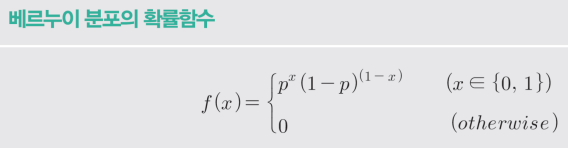

In [233]:
Image('capture_img/ver_01.png')

예제
- 동전을 던져 앞면이 나올 확률
    P(X=1) = (1/2) ** 1 X (1 - 1/2) ** (1-1) = 1/2 
- 주사위를 한 번 굴려 6이 나오지 않을 확률

베르누이 분포의 기댓값과 분산     
- X ~ Bern(p) 라고 할 때 
    E(X) = p, 
    V(X) = p(1-p)
  
- 왜 p 이냐? 
    베르누이 분포의 확률함수의 수식을 계산해보면 결국 p로 계산된다

In [234]:
# 베르누이 분포를 넘파이로 구현해보자

def Bern(p):
    x_set = np.array([0, 1])
    def f(x):
        if x in x_set:
            return p ** x * (1-p) ** (1-x)
        else:
            return 0
    return x_set, f

In [235]:
# Bern(0.3)을 따르는 확률변수 X를 만들어보자

p = 0.3
X = Bern(p)

In [236]:
check_prob(X)

expected value 0.3
variance 0.21


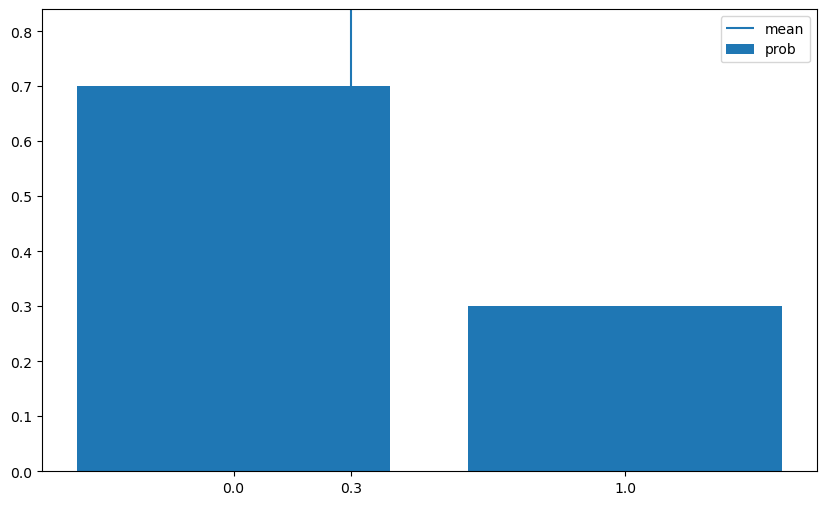

In [237]:
# 확률변수 X를 그려보자
plot_prob(X)
# 중앙의 세로선은 확률변수 X의 기댓값이다.

In [238]:
# scipy.stats의 bernoulli 함수는 베르누이 분포를 따르는 확률변수를 생성함
rv = stats.bernoulli(p)

In [239]:
# pmf 메서드는 확률함수 계산함
rv.pmf(0), rv.pmf(1)

(0.700, 0.300)

In [240]:
rv.pmf([0, 1])

array([0.7, 0.3])

In [241]:
# cdf 메서드는 누적밀도함수 계산함
rv.cdf([0, 1])

array([0.7, 1. ])

In [242]:
# mean, var 메서드로 기댓값, 분산 계산함
rv.mean(), rv.var()

(0.300, 0.210)

베르누이 분포의 정리 => 책 152p 표

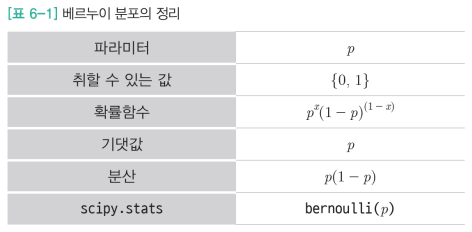

In [243]:
Image("capture_img/ver_02.png")

## 이항분포    
- 성공 확률이 p인 베르누이 시행을 n번 했을 때의 성공 횟수가 따르는 분포
- 파라미터 n, p인 이항분포는 Bin(n, p)
- 이항분포의 확률함수 (ppt 9페이지 수식) 

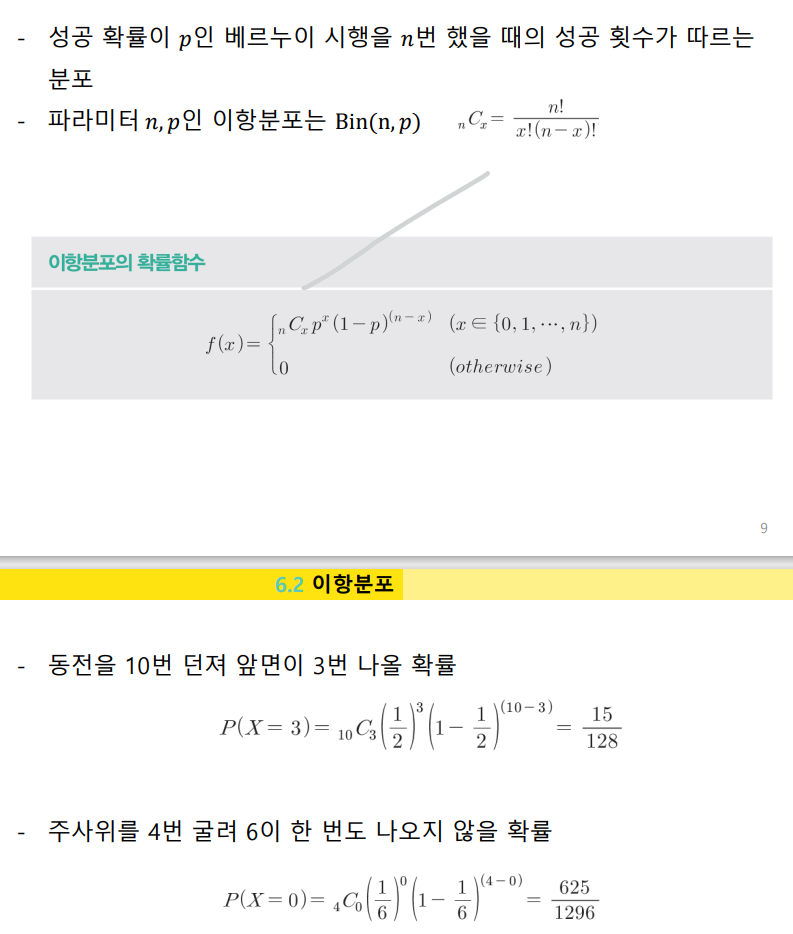

In [244]:
Image("capture_img/ehang_01.png")

예제    (ppt 10 페이지)
- 동전을 10번 던져 앞면이 3번 나올 확률 
- 주사위를 4번 굴려 6이 한번도 나오지 않을 확률


이항분포의 기댓값과 분산
- X ~ Bin(n, p)라고 할 때
    E(X) = np
    V(X) = np(1-p)

In [245]:
# 이항분포를 NumPy로 구현해보자
# 조합 nCx를 계산할 때는 scipy.special에 있는 comb 함수 사용함

from scipy.special import comb

def Bin(n, p):
    x_set = np.arange(n+1)
    def f(x):
        if x in x_set:
            return comb(n, x) * p**x * (1-p)**(n-x)
        else:
            return 0
    return x_set, f

In [246]:
# Bin(10, 0.1)을 따르는 확률변수 X를 작성해보자
n = 10
p = 0.3
X = Bin(n, p)

In [247]:
check_prob(X)

#기대값은 10 * 0.3 = 3
#분산은 10 * 0.3 * 0.7 = 2.1이 됨을 알 수 있다.

expected value 3.0
variance 2.1


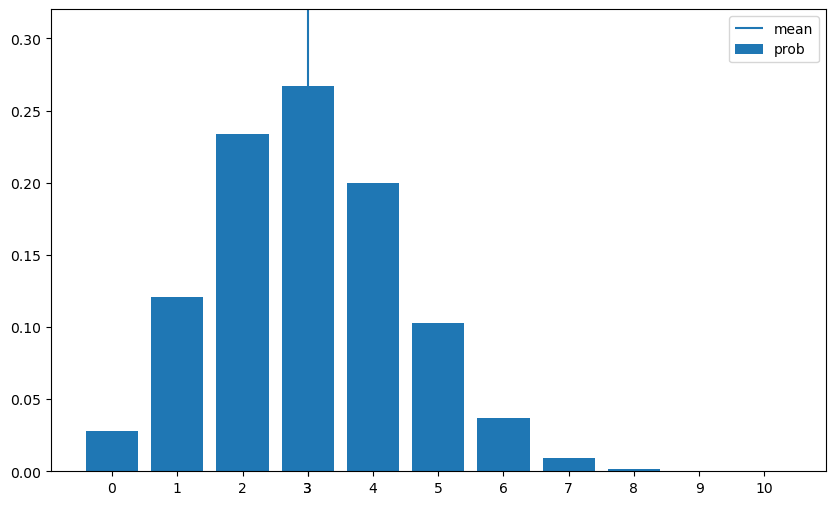

In [248]:
plot_prob(X)

# 그래프를 그려보니 이항분포는 기댓값이 정상이 되는 산모양 분포를 그린다.

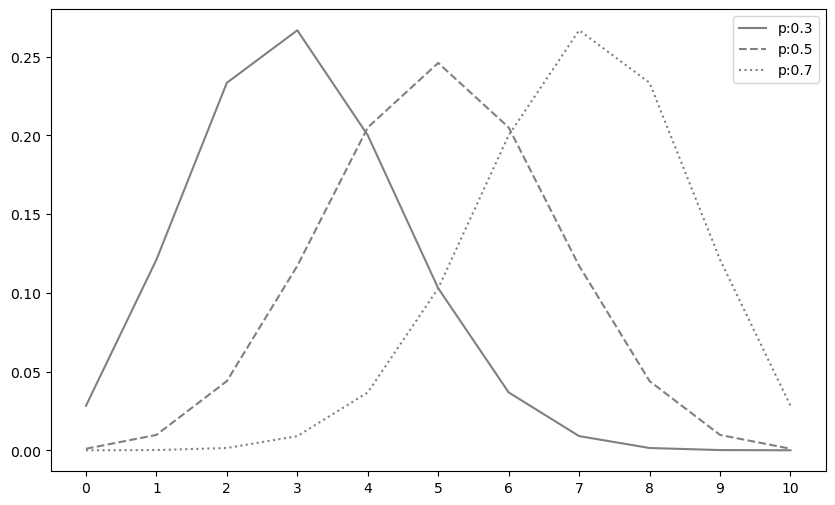

In [249]:
# p를 0.3 0.5 0.7로 변화시켜 이항분포가 어떠한 형태가 되는지 그래프로 그려보자

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

x_set = np.arange(n+1)
for p, ls in zip([0.3, 0.5, 0.7], linestyles):
    rv = stats.binom(n, p)
    ax.plot(x_set, rv.pmf(x_set),
            label=f'p:{p}', ls=ls, color='gray')
ax.set_xticks(x_set)
ax.legend()

plt.show()

# p가 커질수록 정상이 되는 값이 커진다.

이항분포의 정리 => 피피티 15페이지

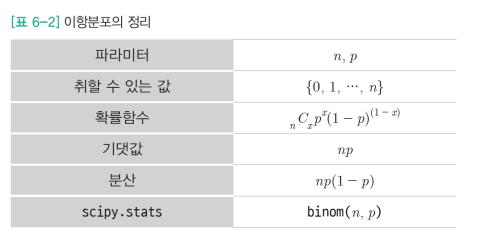

In [250]:
Image("capture_img/ehang_02.png")

## 기하분포
- 베르누이 시행에서 처음 성공할 때까지 반복한 시행 횟수가 따르는 분포
- 파라미터 p인 기하분포는 Ge(p)
- 기하분포의 확률함수 수식 (피피티 16페이지)

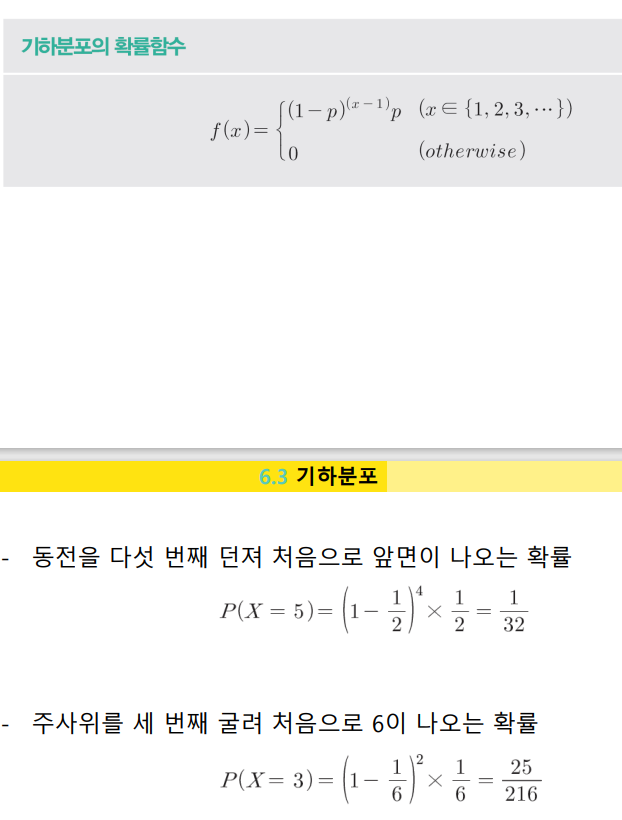

In [251]:
Image("capture_img/giha_01.png")

예제    
- 동전을 다섯번째 던져 처음으로 앞면이 나오는 확률
- 주사위를 세번째 굴려 처음으로 6이 나오는 확률

기하분포의 기댓값과 분산
- X ~ Ge(P)라고 할 떄
    E(X) = 1/p
    V(X) = (1-p) / p ** 2

In [252]:
# 기하분포를 넘파이로 구현해보자
# 기하분포가 취하는 값은 1 이상의 정수 전부이지만 편의상 x_set을 1~29 범위의 정수로 하자
def Ge(p):
    x_set = np.arange(1, 30)
    def f(x):
        if x in x_set:
            return p * (1-p) ** (x-1)
        else:
            return 0
    return x_set, f

In [253]:
# 그리고 확률변수 X는 Ge(1/2)를 따르는 것으로 하자
p = 0.5
X = Ge(p)

In [254]:
check_prob(X)

# 기댓값은 2 , 분산은 2가 된다.

expected value 2.0
variance 2.0


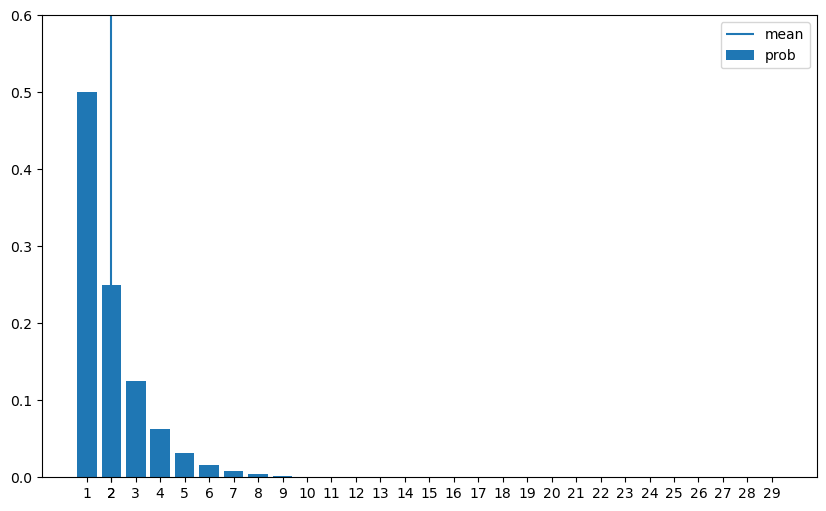

In [255]:
plot_prob(X)

# 그래프를 그렸더니 확률변수의 값이 커질수록 확률은 지수적으로 감소한다.
# 11 이상인 값을 취하는 확률은 거의 0이 되므로 그래프에서 확인 불가능

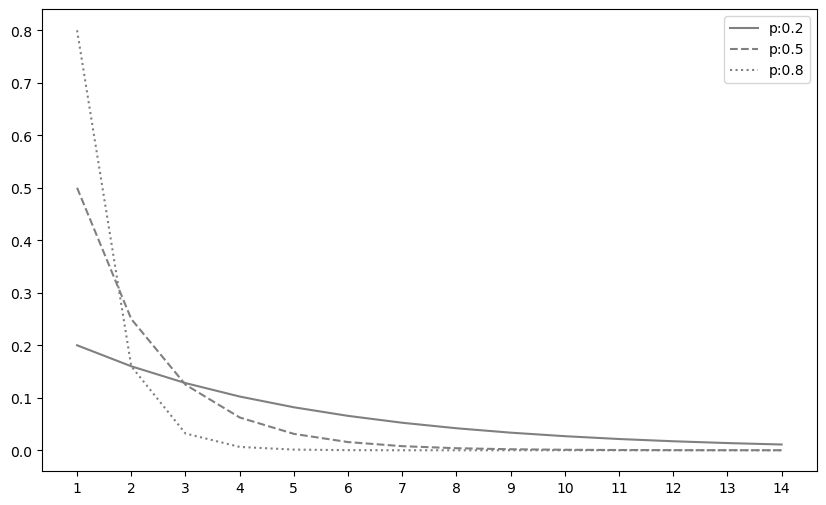

In [256]:
# 파라미터 p가 0.2 0.5 0.8일 떄의 기하분포를 그려보자

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

x_set = np.arange(1, 15)
for p, ls in zip([0.2, 0.5, 0.8], linestyles):
    rv = stats.geom(p)
    ax.plot(x_set, rv.pmf(x_set),
            label=f'p:{p}', ls=ls, color='gray')
ax.set_xticks(x_set)
ax.legend()

plt.show()

# 파라미터 p가 무엇이든지 간에 값이 커질수록 확률이 지수적으로 감소하는 분포가 됨을 알 수 있다.

기하분포의 정리

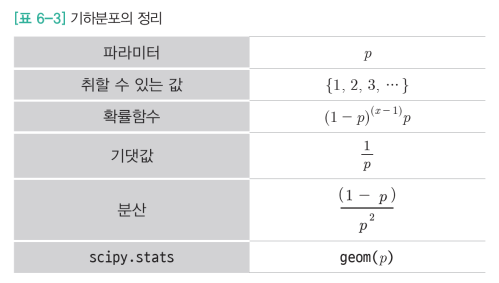

In [257]:
Image('capture_img/giha_02.png')

## 포아송 분포     
- 임의의 사건이 단위 시간당 발생하는 건수가 따르는 확률분포
- 파라미터 λ인 포아송 분포는 Poi(λ)
    관련 수식은 아래 사진
- Poi(λ)는 단위 시간당 평균 λ번 발생하는 임의의 사건이 단위 시간에 발생하는 건수가 따르는 분포

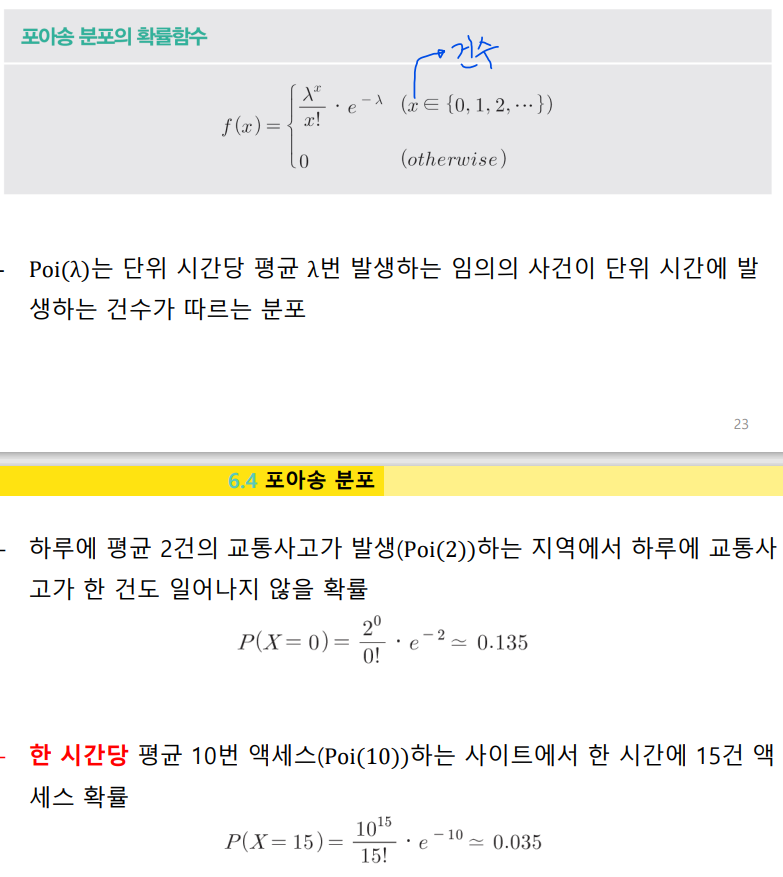

In [258]:
Image('capture_img/poa_01.png')

예제
- 하루에 평균 2건의 교통사고가 발생(Poi(2))하는 지역에서 하루에 교통사고가 한 건도 일어나지 않을 확률
- 1시간당 평균 10번 액세스(Poi(10))하는 사이트에서 한 시간에 15건 액세스 확률

포아송 분포의 기댓값과 분산
- X ~ Poi(λ)라고 할때 
    E(X) = λ
    V(X) = λ


In [259]:
# 포아송 분포를 numpy로 구현해보자
# 팩토리얼은 scipy.special의 factorial을 사용함

# 취할 수 있는 값은 0 이상인 정수 전부이지만, 구현의 편의상 x_set을 0이상 19이하인 정수로 하자

from scipy.special import factorial

def Poi(lam):
    x_set = np.arange(20)
    def f(x):
        if x in x_set:
            return np.power(lam, x) / factorial(x) * np.exp(-lam)
        else:
            return 0
    return x_set, f

In [260]:
# 여기서 확률변수X는 Poi(3)을 따르는 것으로 하자
lam = 3
X = Poi(lam)

In [261]:
check_prob(X)
# 기대값과 분산은 모두 3이 된다.

expected value 3.0
variance 3.0


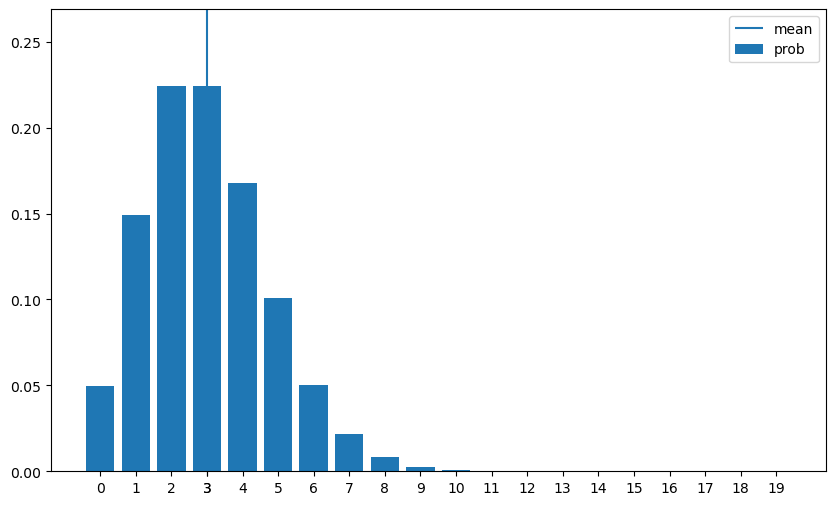

In [262]:
plot_prob(X)
# 그래프로 그렸더니,,
# 포아송 분포도 이항분포와 마찬가지로 기댓값이 정상이 되는 산의 형태를 이룸

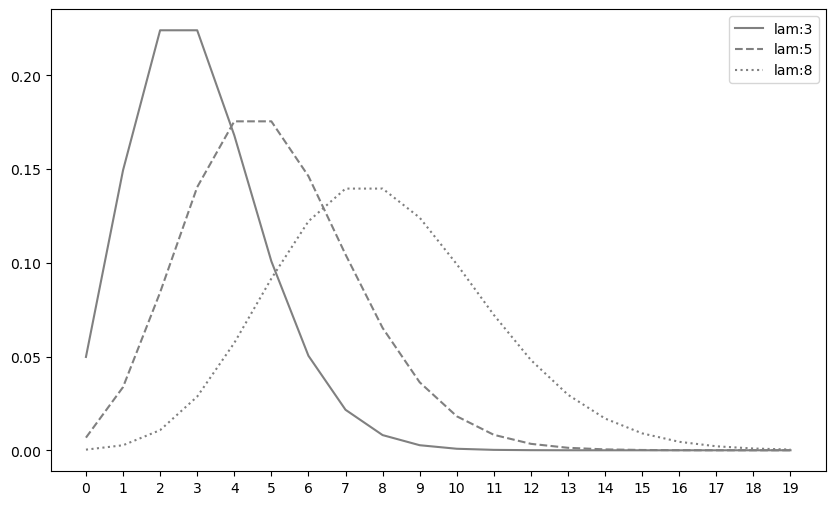

In [263]:
# 파라미터 λ를 3, 5, 8로 변화시킬 때 포아송 분포의 형태가 어떻게 될지 그려보자
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

x_set = np.arange(20)
for lam, ls in zip([3, 5, 8], linestyles):
    rv = stats.poisson(lam)
    ax.plot(x_set, rv.pmf(x_set),
            label=f'lam:{lam}', ls=ls, color='gray')
ax.set_xticks(x_set)
ax.legend()

plt.show()

# 어떤 파라미터라도 분포의 정상에는 λ가 있다
# λ가 커질수록 경사면이 더울 완만해지는 것 확인 가능하다.

포아송 분포의 정리

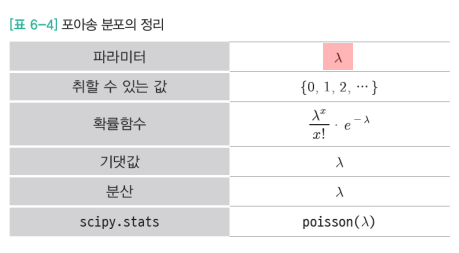

In [264]:
Image('capture_img/poa_02.png')